In [2]:
%matplotlib inline
import xarray as xr
from cmocean import cm as cmo  
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import gsw
from metpy.interpolate import cross_section
import glidertools as gt
import glob
import imageio
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


def gridlines(ax,lon_tick,lat_tick):
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      x_inline=False, y_inline=False,
                      linewidth=0.75, alpha=0.5, linestyle='--',color='w',
                      ylocs = mpl.ticker.MultipleLocator(base=lat_tick),xlocs = mpl.ticker.MultipleLocator(base=lon_tick))
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    gl.xpadding=10
    gl.ypadding=10
    
def gifmaker(impath,savepath,duration):

    filenames = []
    for file in glob.glob(impath): # Specify where the images at
        filenames.append(file)
    filenames.sort(key=os.path.getmtime)

    images = list(map(lambda filename: imageio.imread(filename), filenames))

    imageio.mimsave(os.path.join(savepath), images, duration = duration) # modify duration as needed

In [3]:
sst = xr.open_mfdataset('/Users/xedhjo/Documents/Projects/OC4920/data/sst/apr_may_clim/sst*.nc')

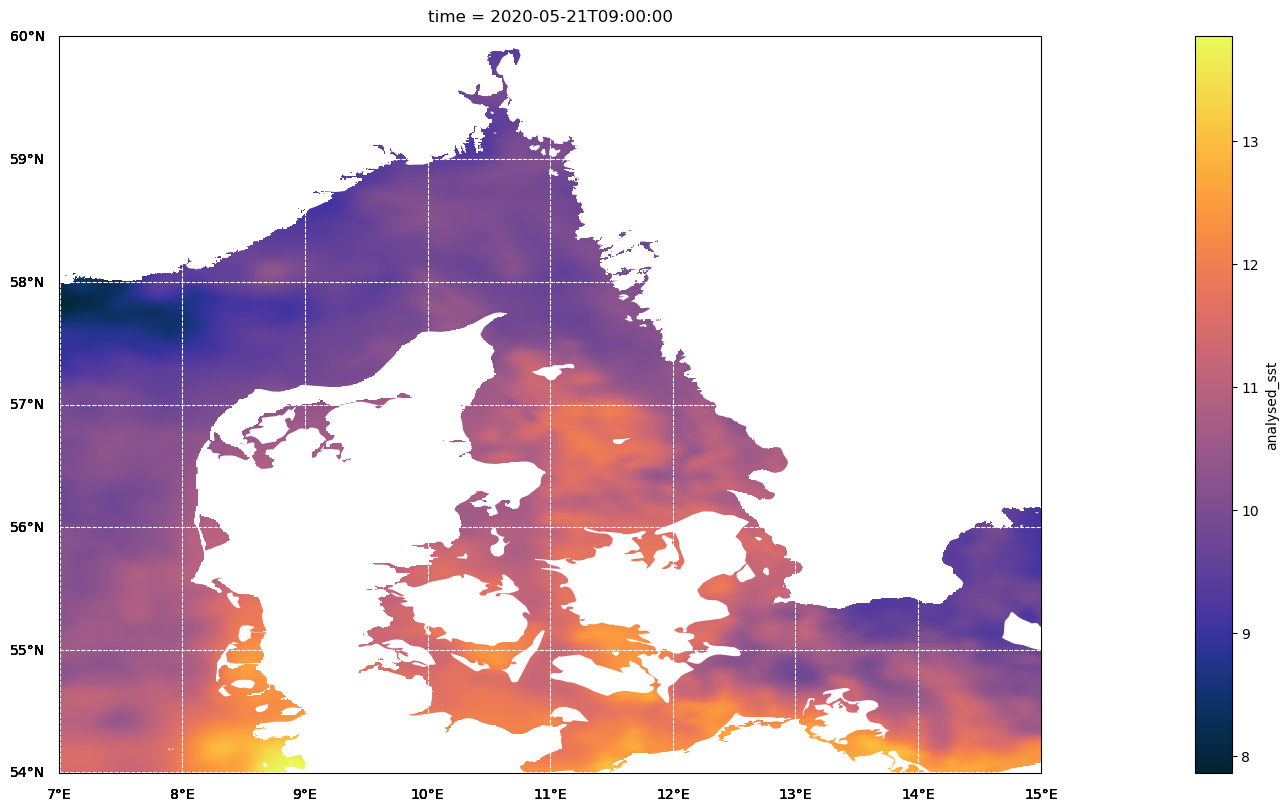

In [4]:
fig, ax = plt.subplots(1,1,figsize=(30,8),subplot_kw={'projection':ccrs.PlateCarree()},constrained_layout=True)
i=50
sst['analysed_sst'].isel(time=i).plot(ax=ax,cmap=cmo.thermal)#,vmin=-2,vmax=30)

# Add land and coastline
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='w'),zorder=3)
#bx.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='w',edgecolor='k'),zorder=3)
#ax.coastlines('10m',zorder=3)
#bx.coastlines('10m',zorder=3)

# Define z-order for the spines, aka frame, so that it's above the map features
#for axs in [ax,bx]:
for k,spine in ax.spines.items():  #ax.spines is a dictionary
    spine.set_zorder(12)
    gridlines(ax,1,1)


In [12]:
sst_month = sst.groupby('time.month').mean('time')

In [14]:
sst_month

<xarray.Dataset>
Dimensions:       (lat: 601, lon: 801, month: 2)
Coordinates:
  * lat           (lat) float32 54.0 54.01 54.02 54.03 ... 59.98 59.99 60.0
  * lon           (lon) float32 7.0 7.01 7.02 7.03 ... 14.97 14.98 14.99 15.0
  * month         (month) int64 4 5
Data variables:
    analysed_sst  (month, lat, lon) float32 dask.array<chunksize=(1, 601, 801), meta=np.ndarray>
    masked_sst    (month, lat, lon) float32 dask.array<chunksize=(1, 601, 801), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    cdm_data_type:              grid
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...
    geospatial_lat_min:         54.0
    geospatial_lat_max:         60.0
    geospatial_lon_min:         7.0
    geospatial_lon_max:         15.0

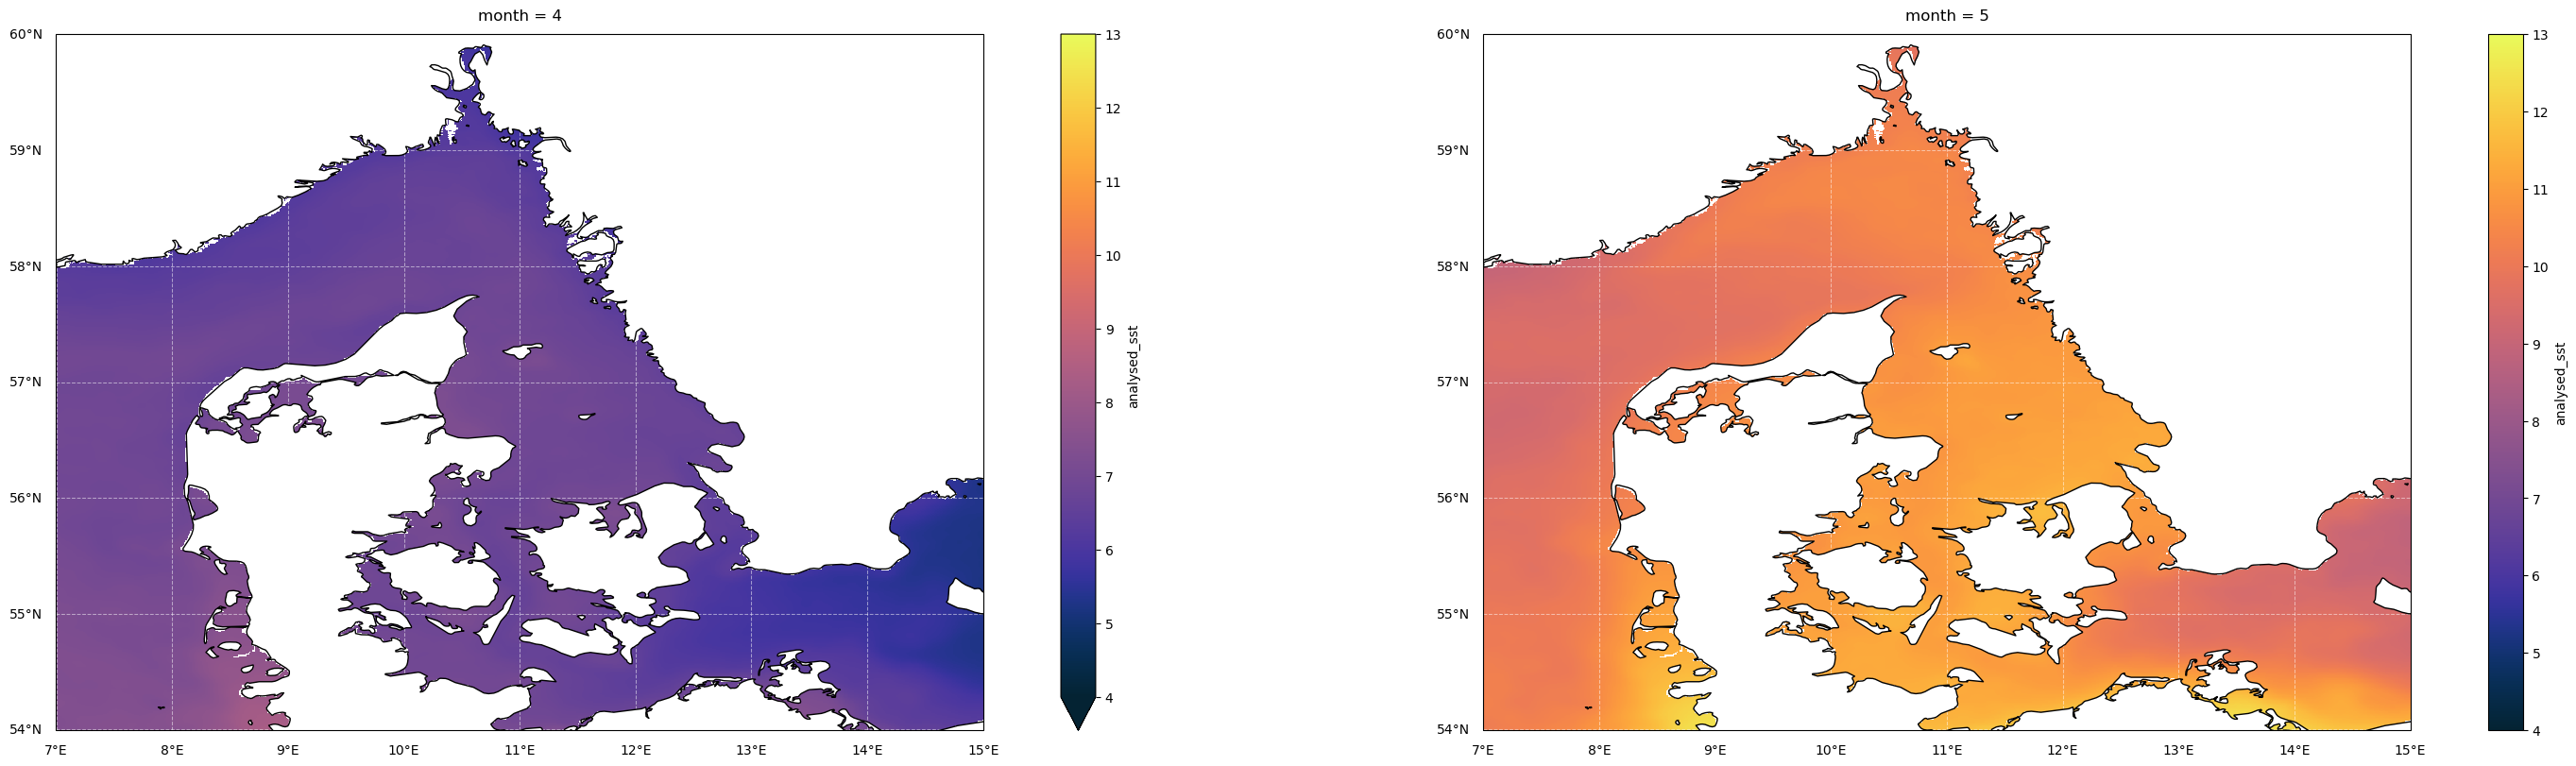

In [28]:
fig, (ax,bx) = plt.subplots(1,2,figsize=(30,8),subplot_kw={'projection':ccrs.PlateCarree()},constrained_layout=True)

sst_month['analysed_sst'].sel(month=4).plot(ax=ax,cmap=cmo.thermal,vmin=4,vmax=13)
sst_month['analysed_sst'].sel(month=5).plot(ax=bx,cmap=cmo.thermal,vmin=4,vmax=13)
#sst['gradient'].isel(time=i).plot(ax=bx,cmap=cmo.speed)

# Add land and coastline
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='w',edgecolor='k'),zorder=3)
bx.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='w',edgecolor='k'),zorder=3)
#ax.coastlines('10m',zorder=3)
#bx.coastlines('10m',zorder=3)

# Define z-order for the spines, aka frame, so that it's above the map features
for axs in [ax,bx]:
    for k,spine in axs.spines.items():  #ax.spines is a dictionary
        spine.set_zorder(12)
    gridlines(axs,1,1)
            #axs.plot([start[1],end[1]],[start[0],end[0]],c='k',zorder=3) 